# **종합실습 단변량 분석**

## **1.비즈니스 시나리오**

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
>
* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


## **2.환경준비**

### **(1) 라이브러리 불러오기**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **(2) 데이터 로딩 : 카시트 판매량 데이터**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	**Sales** 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	**CompPrice** 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	**Income** 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	**Advertising** 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	**Population** 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	**Price** 	|	 자사 지역별 판매가격	|	feature	|
|	**ShelveLoc** 	|	 진열상태	|	feature	|
|	**Age** 	|	 지역 인구의 평균 연령	|	feature	|
|	**Urban** 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	**US** 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


### 다른 사람의 단변량 변수의 해석 보기
https://docs.google.com/spreadsheets/d/16hReiwNszI3tljwxZlamy5Wej0xAa_fquHp0lRgRVgQ/edit#gid=307916551


In [5]:
data.to_csv('../데이터/Carseats.csv', sep=',', index=False)

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


## **3.단변량분석 : 숫자형 변수**

* 숫자형변수를 분석하는 함수를 생성합시다.

In [6]:
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

### **(1) Sales (Target)**

In [7]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


<< 그래프 >>


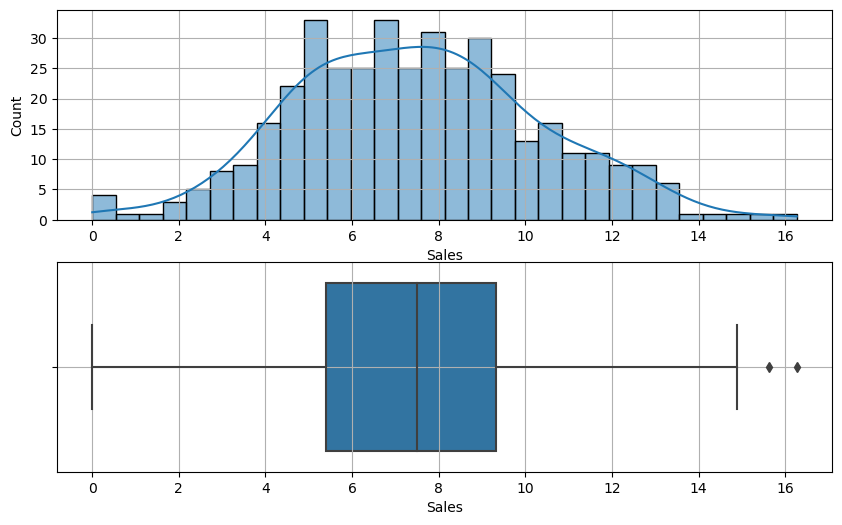

In [8]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 주로 판매량이 5~9*1000개인 지점수가 밀집되어 있어
* 판매량과 다른 변수와의 상관관계를 봐보자!

* 대부분의 판매량이 5천개 ~ 만개 사이

4) 추가 분석해 볼 사항이 있나요?

In [ ]:
* 

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

### **(2) Price**

In [10]:
var = 'Price'

1) 변수의 비즈니스 의미

* 지역별 판매 가격


2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


<< 그래프 >>


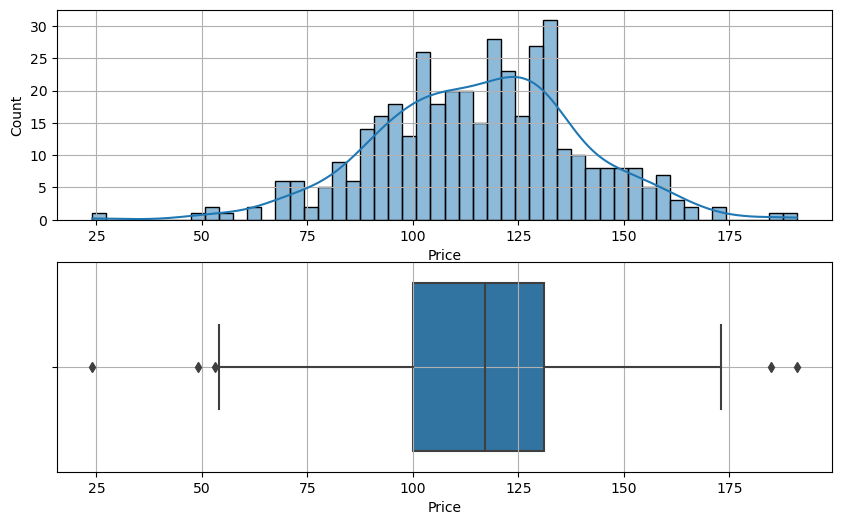

In [13]:
eda_1_num(data, var, bins=50)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 가격이100 ~ 130 달러로 대부분 형성되어 있어


4) 추가 분석해 볼 사항이 있나요?

* 100 이하 100과 130 사이, 130 이상 으로 구분해서 sales 와 관계성을 분석해볼 필요가 있다. -> 이변량 분석
* 가격을 낮게 파는 지역의 특성을 분석할 필요가 있다.
* 가격을 높게 파는 지역의 특성을 분석할 필요가 있다.


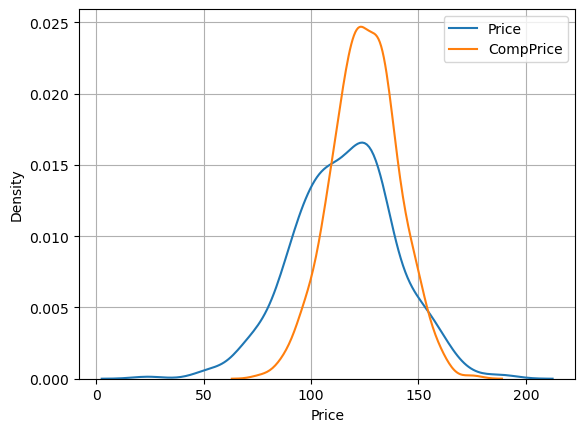

In [43]:
sns.kdeplot(x='Price', data=data, label='Price')
sns.kdeplot(x='CompPrice', data=data, label='CompPrice')
plt.legend()
plt.grid()
plt.show()

### **(3) Income**

In [32]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득
* 단위 1000 달러

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


<< 그래프 >>


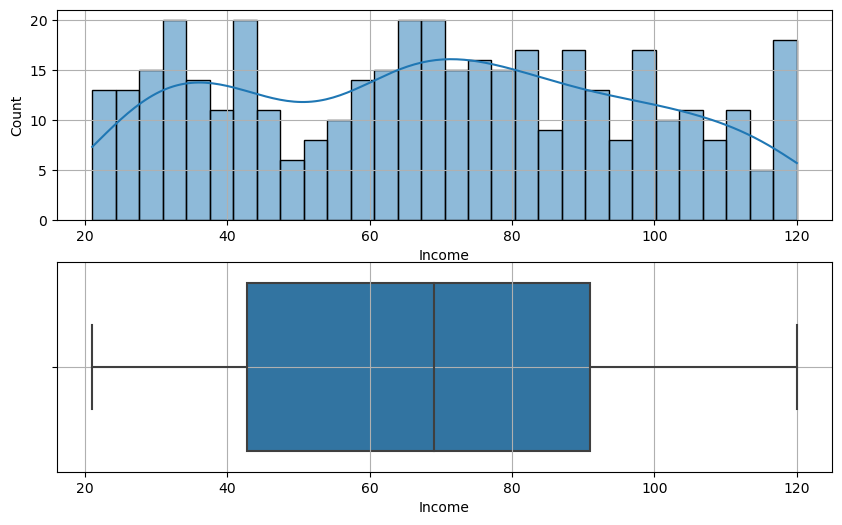

In [33]:
eda_1_num(data,var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 지역 소득은 스펙트럼이 넓어
* 한 쪽으로 치우치지 않았어

4) 추가 분석해 볼 사항이 있나요?

* 중산층, 부촌, 가난한 동네 로 나누어서 분석 sales에 얼만큼 영향을 미치는지 분석

### **(4) Advertising**

In [37]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역 회사의 광고 예산
* 단위 : 1000 달러

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


<< 그래프 >>


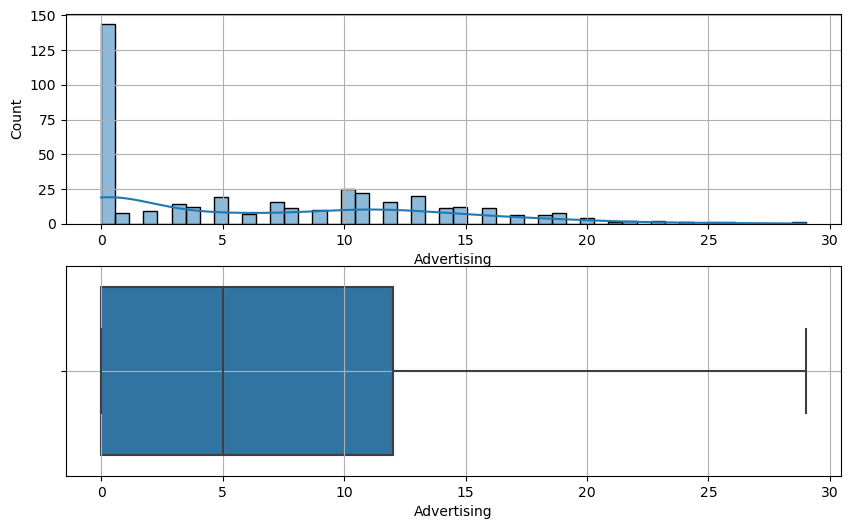

In [38]:
eda_1_num(data,var, bins=50)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 지역별 광고 예산이  안하거나 5000달러 미만으로 대부분 산정되어 있다.

4) 추가 분석해 볼 사항이 있나요?

* 광고를 안 하는 경우와 지역 인구 당 광고비가 sales에 미치는 영향을 분석해볼 필요가 있다.
* 사용한 지역과 사용하지 않은 지역에는 어떤 특성 차이가 있을까?

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


<< 그래프 >>


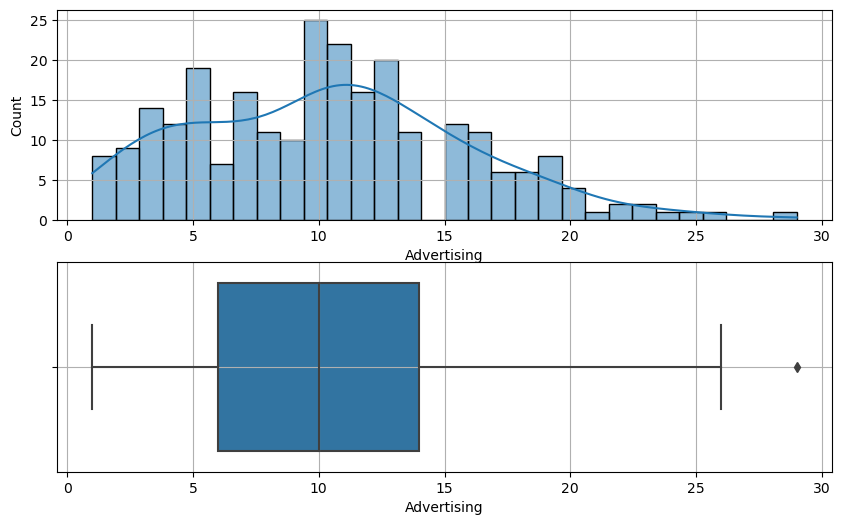

In [44]:
temp = data[data['Advertising']>0]
eda_1_num(temp,'Advertising')

### **(5) Population**

In [34]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역별 인구수
* 단위 : 1000명

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


<< 그래프 >>


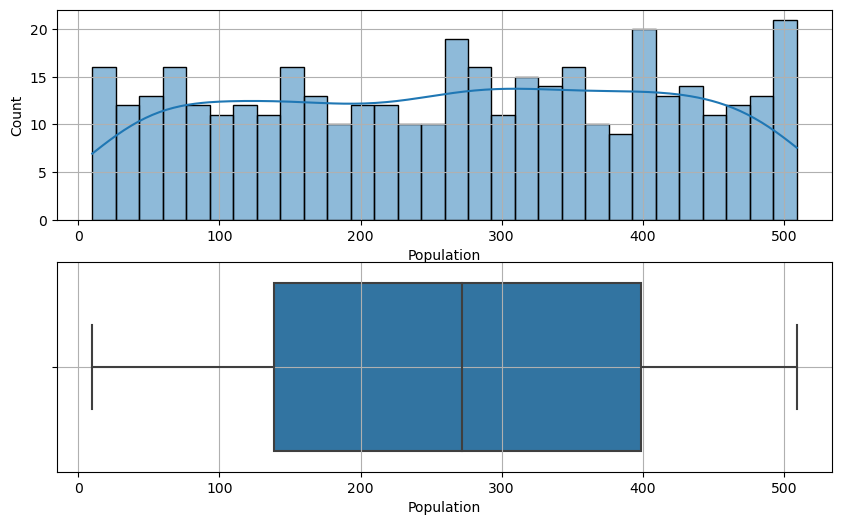

In [35]:
eda_1_num(data,var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 지역별로 인구수가 다양하다.
* 인구수에 따라서 광고비를 다르게 했을까?

4) 추가 분석해 볼 사항이 있나요?

* 130000 명 이하, 130000~400000, 400000 이상 으로 나누어 분석

### **(6) CompPrice**

In [18]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사 가격
* 단위 : 달러

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


<< 그래프 >>


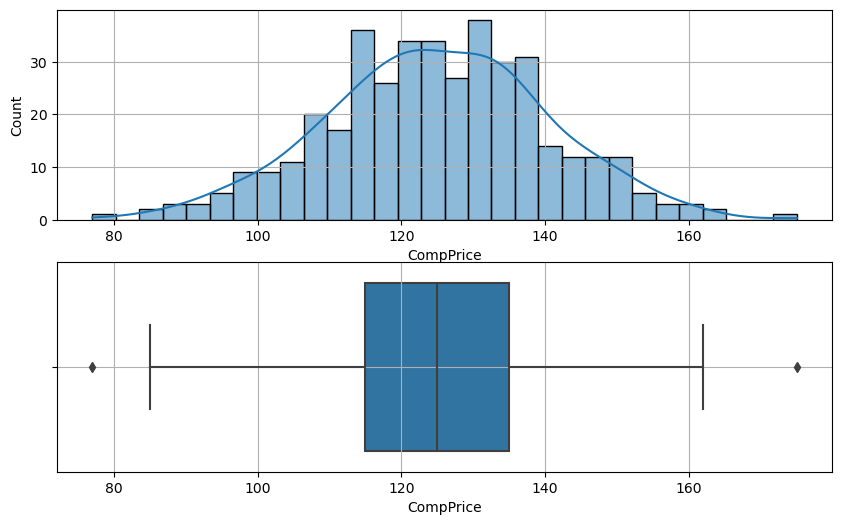

In [19]:
eda_1_num(data,var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 경쟁사 가격이 115~135 달러에 주로 분포해 있어
* 낮은 가격에 제공할 수 있는 이유는 무엇일까?
* 비싼 가격에 제공하는 지역은 그럴 수 밖에 없는 이유는 무엇일까?

4) 추가 분석해 볼 사항이 있나요?

* 경쟁사 가격 구간을 115미만, 115이상 135미만, 135이상으로 나누어서 분석해보자

### **(7) Age**

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## **4.단변량분석 : 범주형 변수**

* 함수 생성

In [47]:
def eda_1_cat(data, var) :
    t1 = data[var].value_counts()
    t2 = data[var].value_counts(normalize = True)
    t3 = pd.concat([t1, t2], axis = 1)
    t3.columns = ['count','ratio']
    display(t3)
    sns.countplot(x = var, data = data)
    plt.show()
    

### **(1) ShelveLoc**

In [48]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

,count,ratio
ShelveLoc,,
Medium,219,0.5475
Bad,96,0.2400
Good,85,0.2125


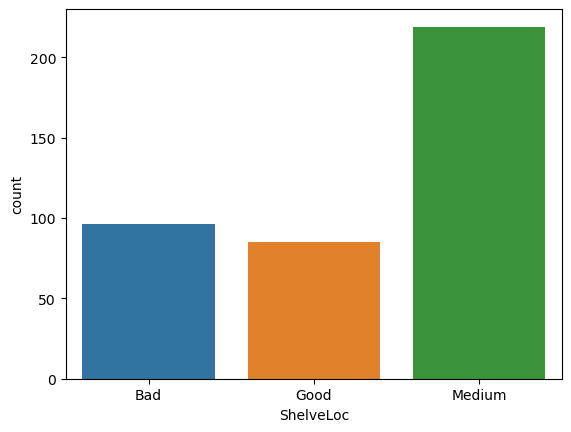

In [49]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

4) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

### **(2) Urban**

In [50]:
var = 'Urban'
data['Urban'].value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

1) 변수의 비즈니스 의미

* 도심 지역 여부
* Yes or No

2) 기초통계량(수치화)

In [51]:
data['Urban'].value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

,count,ratio
Urban,,
Yes,282,0.705
No,118,0.295


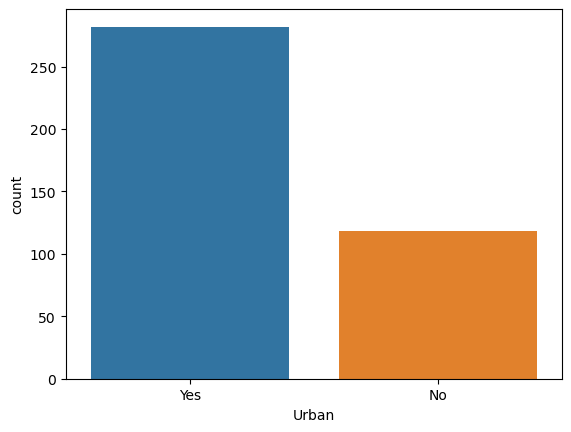

In [52]:
eda_1_cat(data,var)

* 도심지역의 가게가 70% 로 더 많다.
* 도심지역이 더 많은 이유는 지역 인구수 때문인가?
* 도심지역이 아닌 지역에 있는 가게는 어떤 기준으로 있는거지?

4) 추가 분석해 볼 사항이 있나요?

* 지역 인구와 도심 지역 여부 상관관계
* 도심지역이 아닌 가게의 특성
* 도심지역 여부에 따른 판매량 차이
* 도심지역 여부에 따른 광고비 차이

### **(3) US**

In [54]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지 여부
* Yes or No

2) 기초통계량(수치화)

,count,ratio
US,,
Yes,258,0.645
No,142,0.355


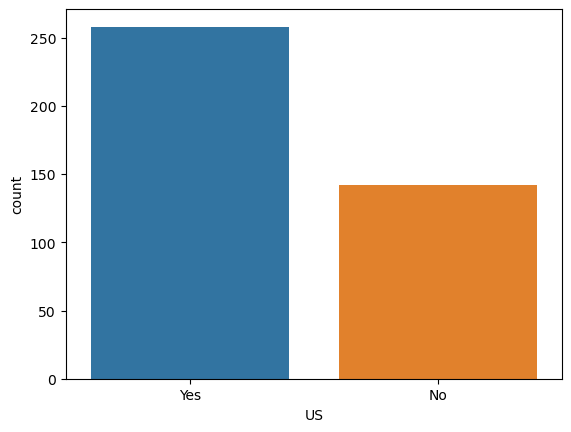

In [55]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 미국에 매장이 있는 경우가 약 65%
* 미국에 있는 지 여부가 판매량 차이는 어떻게 될까?
* 광고비는 다른 나라인 경우가 더 많을 것으로 예상한다.

4) 추가 분석해 볼 사항이 있나요?

* US 여부에 따른 광고비 차이 (해외에 막 진출한 경우 광고비 높게 산정)
* US 여부에 따른 판매량 차이
* US 여부에 따른 판매 가격 차이 (유통비)